<a href="https://colab.research.google.com/github/Ha-minss/Classes-in-University/blob/main/XGboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

# 데이터 불러오기
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

In [42]:
display(df.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [43]:
input = pd.DataFrame(data.data, columns=data.feature_names)
output = data.target

In [52]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
input_scaled = pd.DataFrame(SS.fit_transform(input), columns=input.columns)

In [53]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_output,test_output=train_test_split(input_scaled,output)

In [54]:
from xgboost import XGBClassifier, plot_importance

In [55]:
XGBR = XGBClassifier(max_depth =3, reg_alpha =0.1)

In [56]:
XGBR.fit(train_input,train_output)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [57]:
XGBR.score(test_input,test_output)

0.958041958041958

In [58]:
np.corrcoef(XGBR.predict(test_input),test_output)

array([[1.        , 0.91033552],
       [0.91033552, 1.        ]])

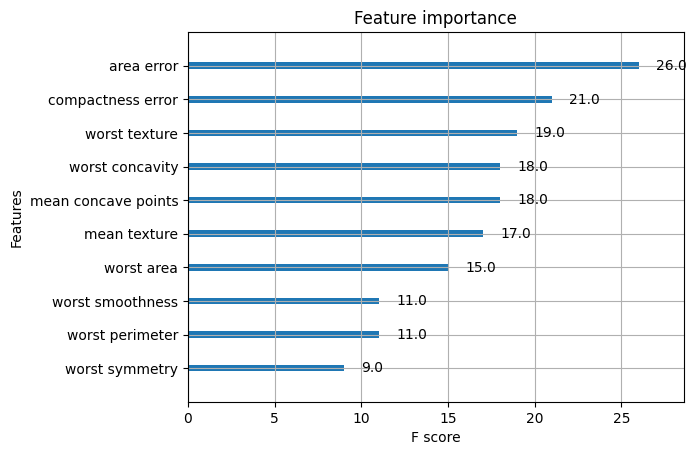

In [59]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plot_importance(XGBR, max_num_features=10)  # 중요도 높은 10개만 볼 수 있음
plt.show()

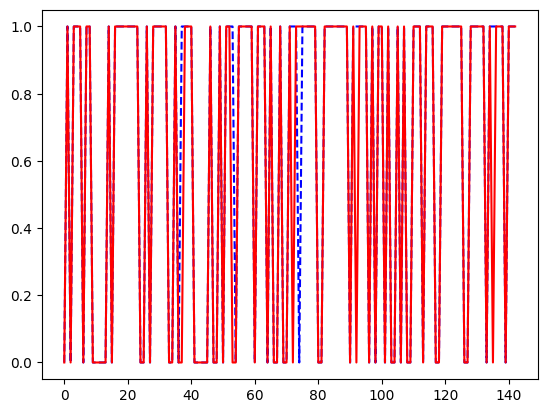

In [60]:
plt.plot(XGBR.predict(test_input), "b--")
plt.plot(test_output,"r")